# Process, curation and filtering of cyanobacteria data

### Preparation

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gmean
from Bio import Entrez
import time
import re
from bs4 import BeautifulSoup
import requests

In [2]:
# Interactive matplotlib plot
%matplotlib notebook

### Data table

Data retrieved by Abhinav Chede from [PCC](https://catalogue-crbip.pasteur.fr/recherche_catalogue.xhtml).

In [3]:
df = pd.read_csv('cyanobacteria_data.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Identification,Taxonomic name,Group of collection,Collection,Unnamed: 5,Type strain,Unnamed: 7,Basonyms,Reference équilibre,Date d'isolement,...,Comments,Sequence reference.1,Risk group,Lieu,Classe emballage,Atmosphère incubation,Medium,link medium composition,Cell Length (vegetatives cells),Cell Length (transient stages)
0,PCC 10605,Cyanobacterium,Cyanobacteria,PCC,407,NaN,NaN,NaN,NaN,01-01-2004,...,Assembly: CA_000317675.1Replicons: chromosome:...,NaN,NaN,"Montegrotto terme, Padua, Italy",NaN,NaN,NaN,https://catalogue-crbip.pasteur.fr/fiche_milie...,No Data,No Data
1,PCC 10914,Mastigocladiopsis repens,Cyanobacteria,PCC,407,NaN,NaN,NaN,NaN,NaN,...,Media: BG11o (n° 1549)Assembly: GCA_000315565....,NaN,NaN,NaN,NaN,Aerobic,NaN,https://catalogue-crbip.pasteur.fr/fiche_milie...,No Data,No Data
2,PCC 11801,Synechococcus elongatus,Cyanobacteria,PCC,407,NaN,NaN,IITB1,NaN,NaN,...,Media : BG11 (1539)Replicon: chromosome: CP030...,NaN,NaN,NaN,NaN,NaN,NaN,https://catalogue-crbip.pasteur.fr/fiche_milie...,NaN,NaN
3,PCC 11802,Synechococcus,Cyanobacteria,PCC,407,NaN,NaN,IITB2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://catalogue-crbip.pasteur.fr/fiche_milie...,NaN,NaN
4,PCC 11901,Synechococcus,Cyanobacteria,PCC,407,NaN,NaN,NTU 1704,NaN,05-06-2017,...,"Media : ASNIII + Vitamin B12 (10 µg/l, obligat...",NaN,NaN,NaN,NaN,NaN,NaN,https://catalogue-crbip.pasteur.fr/fiche_milie...,NaN,NaN


In [4]:
# Number of records
df.shape

(478, 35)

Drop records without identification

In [5]:
df = df.dropna(subset = ['Identification']).astype({'Identification': str})
df.shape

(478, 35)

Add cell length ($\mu m$) for vegetative states from the column 'Properties'?
* PCC 11801: 2.2 - 3.6
* PCC 11802: <= 6
* PCC 11901: 1.6 - 1.9 (length), 1.1 (width
* **No because we do not know whether the size corresponds to the vegetative or transient stage. Ferran needs to curate these entries!**

Curate entries pointed out by Ferrán

In [6]:
df[df['Identification'] == 'PCC 7425']

,Identification,Taxonomic name,Group of collection,Collection,Unnamed: 5,Type strain,Unnamed: 7,Basonyms,Reference équilibre,Date d'isolement,...,Comments,Sequence reference.1,Risk group,Lieu,Classe emballage,Atmosphère incubation,Medium,link medium composition,Cell Length (vegetatives cells),Cell Length (transient stages)
165,PCC 7425,Cyanothece,Cyanobacteria,PCC,407,NaN,NaN,Synechococcus sp.,NaN,01-01-1972,...,Notice&nbsp;:&nbsp; This strain is cryopreserv...,NaN,NaN,Senegal,B,Aerobic,1539.0,https://catalogue-crbip.pasteur.fr/fiche_milie...,e,No Data


In [7]:
df.at[165, 'Cell Length (vegetatives cells)'] = '3-3.5'

In [8]:
df[df['Identification'] == 'PCC 6308']

,Identification,Taxonomic name,Group of collection,Collection,Unnamed: 5,Type strain,Unnamed: 7,Basonyms,Reference équilibre,Date d'isolement,...,Comments,Sequence reference.1,Risk group,Lieu,Classe emballage,Atmosphère incubation,Medium,link medium composition,Cell Length (vegetatives cells),Cell Length (transient stages)
12,PCC 6308,Geminocystis herdmanii,Cyanobacteria,PCC,407,NaN,NaN,"Anacystis montana, Gloeocapsa alpicola",ACMM 441;CALU 743;UTEX LB 1598 as Gloeocapsa a...,01-01-1949,...,GCA_000332235.1Replicon: chromosome: NZ_CM0017...,NaN,NaN,"Wisconsin, USA",B,Aerobic,1539.0,https://catalogue-crbip.pasteur.fr/fiche_milie...,3.5-4,No Data


In [9]:
df.at[12, 'Cell Length (vegetatives cells)'] += '-4-5'

In [10]:
df[df['Identification'] == 'PCC 6804']

,Identification,Taxonomic name,Group of collection,Collection,Unnamed: 5,Type strain,Unnamed: 7,Basonyms,Reference équilibre,Date d'isolement,...,Comments,Sequence reference.1,Risk group,Lieu,Classe emballage,Atmosphère incubation,Medium,link medium composition,Cell Length (vegetatives cells),Cell Length (transient stages)
53,PCC 6804,Synechocystis,Cyanobacteria,PCC,407,NaN,NaN,NaN,NaN,01-01-1968,...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nNo...,NaN,NaN,"California, USA",B,Aerobic,1539.0,https://catalogue-crbip.pasteur.fr/fiche_milie...,6,No Data


In [11]:
df.at[53, 'Cell Length (vegetatives cells)'] += '-7'

In [12]:
df[df['Identification'] == 'PCC 6806']

,Identification,Taxonomic name,Group of collection,Collection,Unnamed: 5,Type strain,Unnamed: 7,Basonyms,Reference équilibre,Date d'isolement,...,Comments,Sequence reference.1,Risk group,Lieu,Classe emballage,Atmosphère incubation,Medium,link medium composition,Cell Length (vegetatives cells),Cell Length (transient stages)
55,PCC 6806,Synechocystis,Cyanobacteria,PCC,407,NaN,NaN,NaN,NaN,01-01-1968,...,NaN,NaN,NaN,"California, USA",B,Aerobic,1539.0,https://catalogue-crbip.pasteur.fr/fiche_milie...,2.3 - 2.5,No Data


In [13]:
df.at[55, 'Cell Length (vegetatives cells)'] += '-6-7'

In [14]:
df[df['Identification'] == 'PCC 7505']

,Identification,Taxonomic name,Group of collection,Collection,Unnamed: 5,Type strain,Unnamed: 7,Basonyms,Reference équilibre,Date d'isolement,...,Comments,Sequence reference.1,Risk group,Lieu,Classe emballage,Atmosphère incubation,Medium,link medium composition,Cell Length (vegetatives cells),Cell Length (transient stages)
182,PCC 7505,Leptolyngbya,Cyanobacteria,PCC,407,NaN,NaN,NaN,NaN,01-01-1973,...,NaN,NaN,NaN,"Amparai District, Maha Oya, Sri Lanka",B,Aerobic,1539.0,https://catalogue-crbip.pasteur.fr/fiche_milie...,1.8 - 2.3,No Data


In [15]:
df.at[182, 'Cell Length (vegetatives cells)'] += '-4'

NCBI TaxID

**We will extract the taxID using the 'Taxonomic name' + 'Identification' or Assembly ID**

Drop entries without cell lenght in vegetative state

In [16]:
df['length'] = df['Cell Length (vegetatives cells)'].apply(lambda x: np.NaN if x == 'No Data' or x is np.NaN else str(x))

In [17]:
df = df.dropna(subset = ['length']).astype({'length': str})
df.shape

(225, 36)

Function use NBCI taxonomy, which is updated frequently. Therefore, I ran the analysis once and store the results in a table (`data_cyanobacteria_taxID.tsv`) for reproducibility. 

In [18]:
# def findtaxID(term, email = 'hsecaira@asu.edu'):
#     '''
#     Function that fins the NCBI taxID using the strain name of records
#     Inputs:
#         term: str containing the search term ('Taxonomic name' + 'Identification')
#         email: str containing an email, necessary to perform queries in NCBI
#     Outputs:
#         taxID: int containing the NCBI taxID
#         name: str containing the scientific name
#     '''
    
#     # Check length of search term
#     #term = term.lower().replace(' ', '+')
#     try:
#         if len(term.split(' ')) == 4:
#             # In this case the term contains the complete name as XX xx PCC xxxxx
#             Entrez.email = email
#             handle = Entrez.esearch(db = "Taxonomy", term = term + '[Organism]')
#             record = Entrez.read(handle)
#             taxID = record["IdList"][0]
#             # Retrieve entry to get the scientific name
#             handle = Entrez.efetch(db = "Taxonomy", id = taxID, retmode = "xml")
#             records = Entrez.read(handle)
#             name = records[0]['ScientificName']
#         elif len(term.split(' ')) == 3:
#             # In this case the term does not contain a complete name: genus + strain name 
#             Entrez.email = email
#             handle = Entrez.esearch(db = "Taxonomy", term = term)
#             record = Entrez.read(handle)
#             taxID = record['IdList'][0]
#             # Retrieve entry to get the scientific name
#             handle = Entrez.efetch(db = "Taxonomy", id = taxID, retmode = "xml")
#             records = Entrez.read(handle)
#             name = records[0]['ScientificName']
    
#         return int(taxID), str(name)
#     except:
#         return np.NaN, np.NaN
        

In [19]:
# def findtaxID2(assembly, email = 'hsecaira@asu.edu'):
#     '''
#     Function that retrieves the NCBI taxID from the assembly accession
#     Inputs:
#         assembly: str containing the assembly accession
#         email: str containing an email, necessary to perform queries in NCBI
#     Outputs:
#         taxID: int containing the NCBI taxID
#         name: str containing the scientific name
#     '''
#     # Perform search of assembly accession
#     Entrez.email = email
#     handle = Entrez.esearch(db = "assembly", term = assembly)
#     record = Entrez.read(handle)
#     asID = record['IdList'][0]
#     # Get a full report and extract organims name
#     handle = Entrez.esummary(db = "assembly", id = asID, report = "full")
#     record = Entrez.read(handle)
#     orgName = ' '.join(record['DocumentSummarySet']['DocumentSummary'][0]['Organism'].split(' ')[:-1])
#     # Get taxID
#     taxID, name = findtaxID(orgName)
#     return taxID, name

In [20]:
# def findtaxID4(term):
#     '''
#     Function that finds the NCBI taxID using the full name
#     Inputs:
#         term: str containing the search term ('Taxonomic name' + 'Identification')
#     Outputs:
#         taxID: int containing the NCBI taxID
#         name: str containing the scientific name 
#     '''
#     # Link for search
#     url = 'https://www.ncbi.nlm.nih.gov/taxonomy/?term=' + term.replace(' ', '+') + '&report=taxon&format=text'
#     #print(url)
#     try: 
#         # Search for scientific name
#         resp = requests.get(url)
#         # Parse html
#         soup = BeautifulSoup(resp.content, "html.parser")
#         name = soup.find('pre').text.strip()
#         #print(name)
#         if len(name) != 0:
#             # Search for taxID
#             url = 'https://www.ncbi.nlm.nih.gov/taxonomy/?term=' + term.replace(' ', '+') + '&report=taxid&format=text'
#             resp = requests.get(url)
#             # Parse html
#             soup = BeautifulSoup(resp.content, "html.parser")
#             taxID = soup.find('pre').text.strip()
#             if '\n' in taxID:
#                 print(f'Check: {name}, more than one taxID!')
            
#             #print(taxID, name)
#             return taxID, name
#         else:
#             return np.NaN, np.NaN
    
#     except:
        
#         return np.NaN, np.NaN

**Function takes some time to run, so I will download the processed data frame**

In [21]:
# # Create an assembly column
# df['Assembly'] = None
# for i, row in df.iterrows():
#     asID = re.findall('[Aa]ssembly\s*:\s*G?C[AF]\_[0-9]{9}\.[0-9]?', str(row['Comments']))
#     if asID:
#         asID_ = asID[0].split(':')[-1].strip()
#         df.at[i, 'Assembly'] = asID_
#     else:
#         df.at[i, 'Assembly'] = np.NaN

In [22]:
# df.shape

In [23]:
# # Get taxID using organism name
# df['taxID_name'] = None
# df['name1'] = None
# for i, row in df.iterrows():
#     org = row['Taxonomic name'] + ' ' + row['Identification']
#     t, n = findtaxID(org)
#     df.at[i, 'taxID_name'] = t
#     df.at[i, 'name1'] = n
#     time.sleep(1)

In [24]:
# # Get taxID using assembly accession
# df['taxID_assembly'] = None
# df['name2'] = None
# for i, row in df.iterrows():
#     if row['Assembly'] is not np.NaN:
#         asem = df.at[i, 'Assembly'].split('.')[0]
#         t, n = findtaxID2(asem)
#         df.at[i, 'taxID_assembly'] = t
#         df.at[i, 'name2'] = n
#         time.sleep(1)
#     else:
#         df.at[i, 'taxID_assembly'] = np.NaN
#         df.at[i, 'name2'] = np.NaN

In [25]:
# df['taxID_name'].notna().sum()

In [26]:
# df['taxID_assembly'].notna().sum()

**It seems that 'taxID_name' is for the species name, whereas 'taxID_assembly' is for the strain name. Both are correct, but I will choose 'taxID_name'**.

In [27]:
# # Create column containing taxID from two methods
# df['taxID'] = None
# df['spname'] = None
# for i, row in df.iterrows():
#     taxID_name = row['taxID_name']
#     taxID_assem = row['taxID_assembly']
#     name1 = row["name1"]
#     name2 = row["name2"]
#     if taxID_name is not np.NaN and taxID_assem is not np.NaN:
#         # Check if taxID is the same in the two methods
#         if taxID_name == taxID_assem:
#             df.at[i, 'taxID'] = taxID_name
#             df.at[i, 'spname'] = name1
#             #print(f'Same: {i}, taxID_name: {taxID_name}, taxID_assem: {taxID_assem}')
#         else:
#             # Check if species names are the same
#             if name1 in name2:
#                 df.at[i, 'taxID'] = taxID_name
#                 df.at[i, 'spname'] = name1
#             else:
#                 pass
#                 #print(f'Check entry: {i}, taxID_name: {taxID_name}, taxID_assem: {taxID_assem}')
#     elif taxID_name is not np.NaN and taxID_assem is np.NaN:
#         #print(f'Only taxID_name: {i}, taxID_name: {taxID_name}, taxID_assem: {taxID_assem}')
#         df.at[i, 'taxID'] = taxID_name
#         df.at[i, 'spname'] = name1
#     elif taxID_name is np.NaN and taxID_assem is not np.NaN:
#         #print(f'Only taxID_assembly: {i}, taxID_name: {taxID_name}, taxID_assem: {taxID_assem}')
#         df.at[i, 'taxID'] = taxID_assem
#         df.at[i, 'spname'] = ' '.join(name2.split(' ')[0:2])
#     elif taxID_name is np.NaN and taxID_assem is np.NaN:
#         #print(f'Empyt: {i}')
#         df.at[i, 'taxID'] = np.NaN
#         df.at[i, 'spname'] = np.NaN

In [28]:
# df['taxID'].notna().sum()

In [29]:
# df['taxID'].isna().sum()

Check entries with no taxID.



In [30]:
# df[df['taxID'].isna()].head()

In [31]:
# # Get taxID using organism name
# for i, row in df[df['taxID'].isna()].iterrows():
#     org = row['Taxonomic name'] + ' ' + row['Identification']
#     #print(org)
#     t, n = findtaxID4(org)
#     df.at[i, 'taxID'] = t
#     df.at[i, 'spname'] = n
#     time.sleep(1)

In [32]:
# df['taxID'].notna().sum()

Manually check taxID of entries mentioned above

In [33]:
# df[df['spname'] == 'Gloeothece tepidariorum PCC 6909/1\nGloeothece tepidariorum PCC 6909']

In [34]:
# df.at[64, 'spname'] = 'Gloeothece tepidariorum PCC 6909'
# df.at[64, 'taxID'] = '197232'

Entries with no species or strain NCBI taxID will be assigned genus taxID

In [35]:
# # Get taxID for genus
# gtid = {}
# for genus in df[df['taxID'].isna()]['Taxonomic name'].unique():
#     t, n = findtaxID4(genus)
#     gtid[genus] = t

Check entry with more than one taxID

In [36]:
# gtid['Xenococcus'] = '52607'

In [37]:
# for i, row in df[df['taxID'].isna()].iterrows():
#     df.at[i, 'taxID'] = gtid[row['Taxonomic name']]
#     df.at[i, 'spname'] = row['Taxonomic name']

Drop records without NCBI taxID

In [38]:
# df = df.dropna(subset = ['taxID']).astype({'taxID': int})
# df.shape

Drop redundant and useless columns

In [39]:
# df.drop(columns = ['Identification', 'Taxonomic name', 'Group of collection', 'Collection',
#        'Unnamed: 5', 'Type strain', 'Unnamed: 7', 'Basonyms',
#        'Reference équilibre', 'Date d\'isolement', 'T° of incubation in C°',
#        'Bibliography', 'Sequence reference', 'Unnamed: 14', 'Genotype',
#        'Unnamed: 16', 'Unnamed: 17', 'GMO strain', 'Unnamed: 19',
#        'Other designations', 'Isolated from', 'Properties', 'Classification',
#        'Clinical shape', 'Phenotype', 'Comments', 'Sequence reference.1',
#        'Risk group', 'Lieu', 'Classe emballage', 'Atmosphère incubation',
#        'Medium', 'link medium composition', 'Cell Length (vegetatives cells)',
#         'Cell Length (transient stages)', 'Assembly', 'taxID_name', 'name1',
#         'taxID_assembly', 'name2'], inplace = True)

In [40]:
# df.shape

In [41]:
# df.head()

In [42]:
# # Save dataframe
# df.to_csv('data_cyanobacteria_taxID.tsv', sep = '\t')

### Cell size data

As pointed out by Ferran, 'most of the strains with data correspond to prolate spheroids or spheres, which are not very different in the end, and using a diameter and speheres is a good approach'. 

**Therefore, we can assume a sphere shape but for the sake of standarization with the BacDive data, we will simplifie the cell shape as capsules.**

For sphere/spheroid-shaped cells, let width = length

In [43]:
df = pd.read_csv('data_cyanobacteria_taxID.tsv', sep = '\t', index_col = 0)

In [44]:
df['width'] = df['length']

In [45]:
# Add shape column
df['shape'] = 'sphere/spheroid'

Standardize length and width values:

* For ranges (e.g., `4-8`), take geometric mean
* For minimum / maximum values, take boundary.
* There are some exceptions. The following code deals with exceptions.

In [46]:
def size_to_num(size):
    """
    Function that converts a size string into a float number.
    Inputs:
        size: str contining the size
    Outputs:
        s: float containing the standardized size
    """
    if '-' in size:
        if len(size.split('-')) == 2:
            return np.sqrt(np.prod([float(x) for x in size.split('-')]))
        elif len(size.split('-')) > 2:
            return gmean([float(x) for x in size.split('-')])
    elif size.startswith(('>', '<')):
        return float(size[1:])
    else:
        return float(size)

In [47]:
df['length'] = df['length'].apply(size_to_num)
df['width'] = df['width'].apply(size_to_num)

In [48]:
df.head()

,length,taxID,spname,width,shape
5,1.095445,269084,Synechococcus elongatus PCC 6301,1.095445,sphere/spheroid
8,4.472136,118323,Oscillatoria acuminata,4.472136,sphere/spheroid
10,2.034699,1184,Leptolyngbya boryana,2.034699,sphere/spheroid
11,0.894427,59930,Cyanobium gracile,0.894427,sphere/spheroid
12,4.090623,113355,Geminocystis herdmanii PCC 6308,4.090623,sphere/spheroid


### Data distribution

<IPython.core.display.Javascript object>


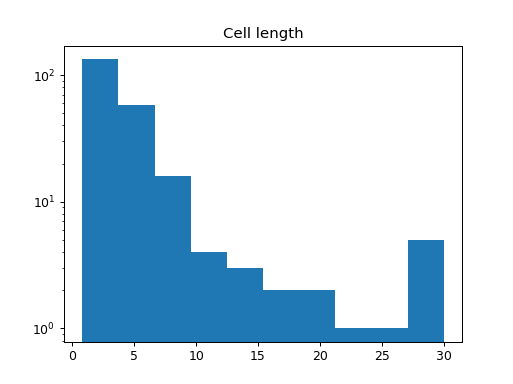

In [49]:
plt.figure()
plt.hist(df['length'], log=True)
plt.title('Cell length')
plt.show()

<IPython.core.display.Javascript object>


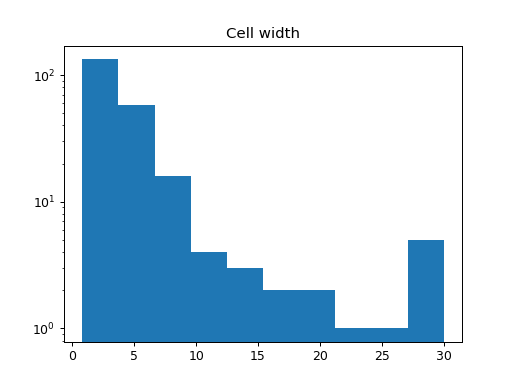

In [50]:
plt.figure()
plt.hist(df['width'], log=True)
plt.title('Cell width')
plt.show()

### Cell colume and surface area

First, assume that cell height equals to cell width. Therefore we have:

Second, assume that cells are [ellipsoids/spheroids](https://en.wikipedia.org/wiki/Ellipsoid):.

- Volume: $ V = \frac{4}{3} \pi a b c$
- Surface area (approximation): $ S \approx 4 \pi \sqrt[p]{\frac{a^{p}b^{p} + a^{p}c^{p} + b^{p}c^{p}}{3}} $

In which $r$ = width / 2 and a, b, c are the radia of the three dimensions (i.e., half of length, width and $r$), $ p \approx $  1.6075.

Assume that cell height equals to cell width. Therefore we have:

Second, assume that cells are [capsules](https://en.wikipedia.org/wiki/Capsule_(geometry)).

- Volume: $ V = \pi r^{2} (\frac{4}{3} r + a)$

- Surface area: $ S = 2 \pi r (2r + a) $

In which $a$ = length - width, $r$ = width / 2.

In [51]:
df['volume'] = np.pi * (df['width'] / 2) ** 2 * ((4 / 3) * (df['width'] / 2) + (df['length'] - df['width']))

In [52]:
df['surface'] = 2 * np.pi * (df['width'] / 2) * (2 * (df['width'] / 2) + (df['length'] - df['width']))

In [53]:
df.head()

,length,taxID,spname,width,shape,volume,surface
5,1.095445,269084,Synechococcus elongatus PCC 6301,1.095445,sphere/spheroid,0.688288,3.769911
8,4.472136,118323,Oscillatoria acuminata,4.472136,sphere/spheroid,46.832098,62.831853
10,2.034699,1184,Leptolyngbya boryana,2.034699,sphere/spheroid,4.410615,13.006194
11,0.894427,59930,Cyanobium gracile,0.894427,sphere/spheroid,0.374657,2.513274
12,4.090623,113355,Geminocystis herdmanii PCC 6308,4.090623,sphere/spheroid,35.839929,52.568900


<IPython.core.display.Javascript object>


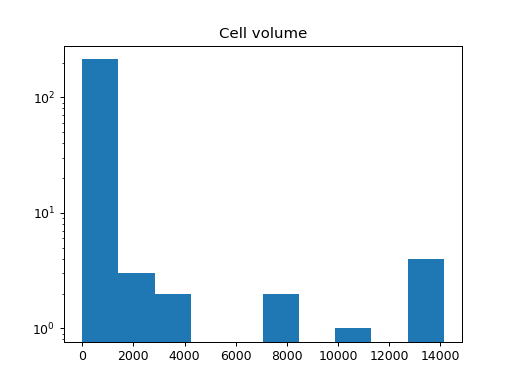

In [54]:
plt.figure()
plt.hist(df['volume'], log=True)
plt.title('Cell volume')
plt.show()

<IPython.core.display.Javascript object>


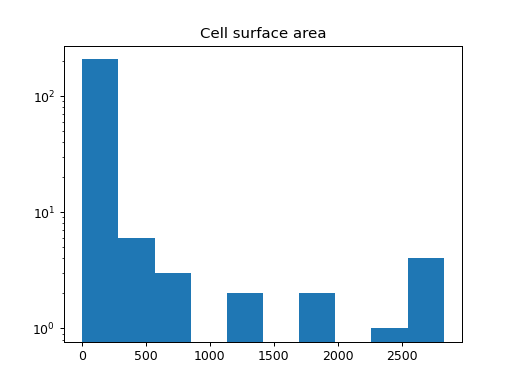

In [55]:
plt.figure()
plt.hist(df['surface'], log=True)
plt.title('Cell surface area')
plt.show()

<IPython.core.display.Javascript object>


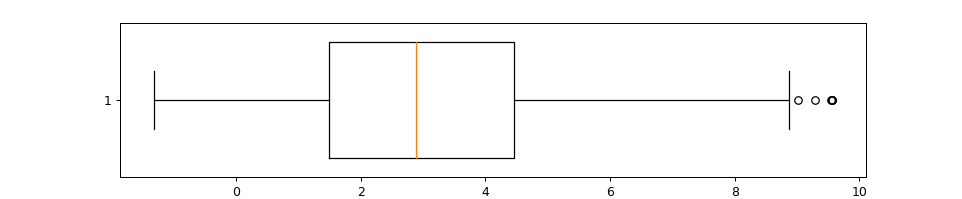

In [56]:
plt.figure(figsize=(12, 2.5))
plt.boxplot(df['volume'].apply(np.log), widths=0.75, vert=False)
plt.show()

<IPython.core.display.Javascript object>


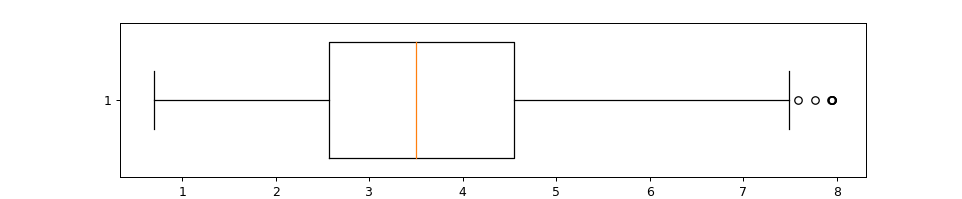

In [57]:
plt.figure(figsize=(12, 2.5))
plt.boxplot(df['surface'].apply(np.log), widths=0.75, vert=False)
plt.show()

### Output

In [58]:
df.shape

(225, 7)

In [59]:
df.to_csv('data_cyanobacteria.tsv', sep = '\t')